# LGMVIP - Data Science - November 2021

#### Task - 1 ( IRIS FLOWER CLASSIFICATION ML PROJECT)

#### Author - Sarangh Ramesh KV

###### Data set used in this project : https://www.canva.com/link?target=http%3A%2F%2Farchive.ics.uci.edu%2Fml%2Fdatasets%2FIris&design=DAEjrwWV35w

###### -------------------------------------------------------------------------------------------------

## 1. Importing libraries

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import datasets

## 2. Reading Data From Dataset

In [4]:
df = pd.read_csv('iris.data.csv') #reading the iris.data.csv file

In [6]:
df.head() #Here The head() function is used to get the first 5 rows

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [13]:
#Here the data doesn't have any proper headings, So let's give some proper heading for each column
df.columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Type_Of_Species']

## 3. Data Exploration & Data Visualization

In [46]:
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Type_Of_Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [47]:
df.shape

(149, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [21]:
df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


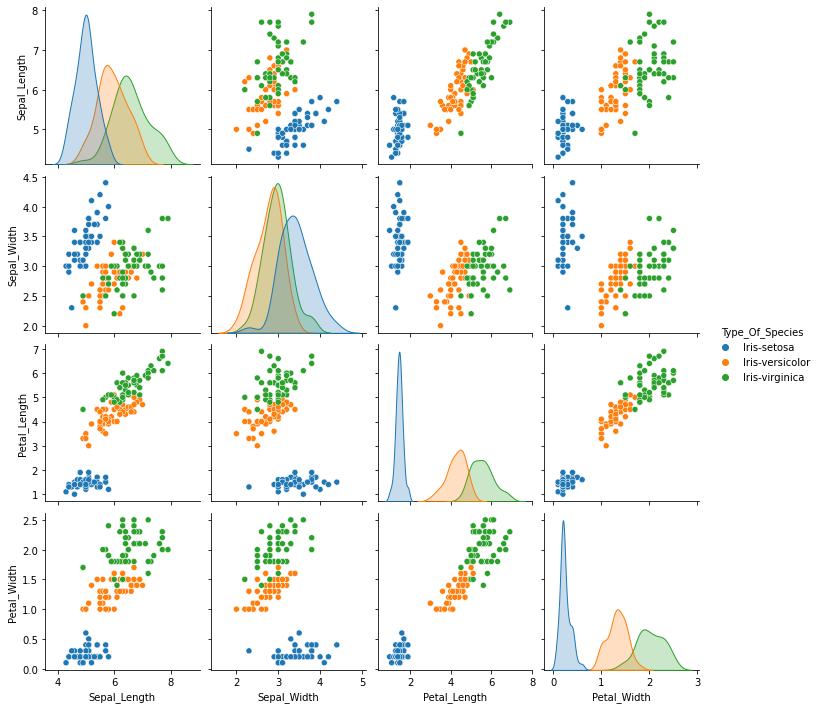

In [35]:
sns.pairplot(df,hue='Type_Of_Species')
plt.show()

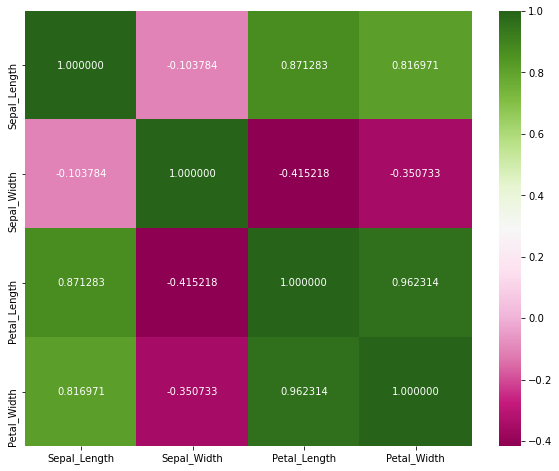

In [45]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt='f',cmap='PiYG')
plt.show()
#Heatmap showing correlation

## Applying Logistic Regression

In [51]:
X=df[['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']] #Assigning features into one group
Y=df['Type_Of_Species'] #Assigning Prediction outcome to one group

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [53]:

from sklearn.linear_model import LogisticRegression # importing the logistic regression function from sklearn
lr = LogisticRegression(random_state=1) # Assigning the function LogisticRegression to a variable called lr
lr.fit(X_train,Y_train) # Fitting the the modle to training set

LogisticRegression(random_state=1)

In [54]:
from sklearn.metrics import classification_report,confusion_matrix
y_predict=lr.predict(X_test)
conf=confusion_matrix(Y_test,y_predict)

In [58]:
print(classification_report(Y_test,y_predict))
print(conf) #printing confussion matrix

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.86      0.92         7

       accuracy                           0.97        30
      macro avg       0.98      0.95      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0 13  0]
 [ 0  1  6]]


In [59]:
from sklearn.metrics import accuracy_score
train_score_lr = str(lr.score(X_train, Y_train)*100)
test_score_lr = str(lr.score(X_test, Y_test)*100)
accu_score_lr=str(accuracy_score(Y_test,y_predict)*100)
print(f'Train Score : {train_score_lr[:5]}%\nTest Score : {test_score_lr[:5]}%\nAccuracy Score : {accu_score_lr[:5]}%')

Train Score : 97.47%
Test Score : 96.66%
Accuracy Score : 96.66%
